Allan deviation of laser intensity fluctuations in binary format, and two channels ch0 and ch1 from two photodiodes

In [4]:

import matplotlib.pyplot as plt
import numpy as np

In [5]:
def remainder(n, m):
    quotient = n // m
    remainder = n % m
    return remainder
    #print(f"Quotient: {quotient}, Remainder: {remainder}")

[0.0000e+00 5.0000e-01 1.0000e+00 ... 1.7985e+03 1.7990e+03 1.7995e+03]
[1.4075469 1.4075096 1.4075097 ... 1.4078406 1.4078404 1.4078068]
N. of elements of each average: 2, N. of averages being computed: 3600
N. of elements of each average: 3, N. of averages being computed: 1800
N. of elements of each average: 4, N. of averages being computed: 1200
N. of elements of each average: 5, N. of averages being computed: 900
N. of elements of each average: 6, N. of averages being computed: 720
N. of elements of each average: 7, N. of averages being computed: 600
N. of elements of each average: 8, N. of averages being computed: 514
N. of elements of each average: 9, N. of averages being computed: 450
N. of elements of each average: 10, N. of averages being computed: 400
N. of elements of each average: 11, N. of averages being computed: 360
N. of elements of each average: 12, N. of averages being computed: 327
N. of elements of each average: 13, N. of averages being computed: 300
N. of elements 

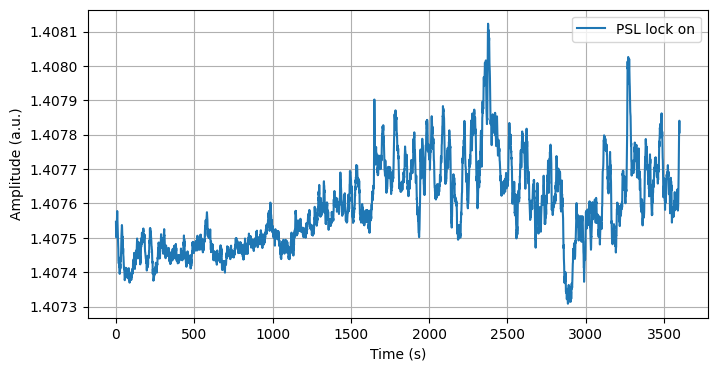

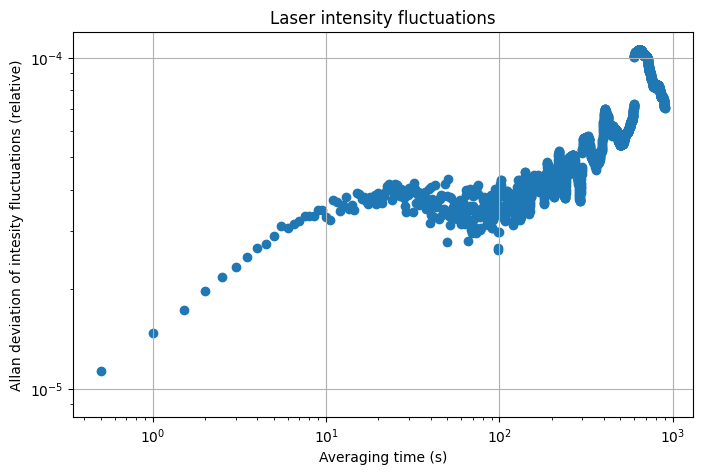

In [6]:
data = np.dtype([('ch0', 'float32'),('ch1', 'float32')])
signaltot = np.fromfile('C:/Users/hodei/Documents/RINbin_data/15decembre_mephisto1_PSL_lowfreq/mephis1errorpowlocked3000prog13int3rin3600_2ch.bin', dtype=data)
upoints = signaltot['ch1']

n = 50000 #number of points to average over (sampling rate is 100kHz, so n=100000 would give 1s averages)
utrimmedlen = len(upoints)//n*n
upoints_matrix = upoints[:utrimmedlen].reshape(-1,n)
umpoints = upoints_matrix.mean(axis=1)

utotaldata = umpoints

##########################powers and mean power########################################
upowers = utotaldata
ux = np.arange(len(upowers),dtype=float)/(1e5/n)
umeanpower = np.mean(upowers)

print(ux)
print(upowers)

##########################averages########################################
uyallan = np.zeros(len(ux))
uyallandev = np.zeros(len(ux))
umean = np.zeros(len(ux))
ustd = np.zeros(len(ux))

for j in range(1, int(len(utotaldata)/2)): #j cannot be larger than half the number of elements in powers
    upowers = utotaldata
    urm = remainder(len(upowers), j)
    #print(rm)
#We remove elements from powers to make it divisible by the number of elements j over which we average for a time interval    
    for i in range(0,urm):
        upowers = np.delete(upowers, len(upowers)-1)
#We calculate averages over slices made of a j number elements       
    for i in range(len(upowers[::j])):
        upowermeans = np.mean(upowers.reshape(-1, j), axis=1) #We reshape the array to have j columns and as many rows as needed, then we average over the rows (axis=1)
    ushifted_powermeans = np.roll(upowermeans,-1)        

    uy = (upowermeans-ushifted_powermeans)/umeanpower #Normalized to the mean power (see Phys. Rev. A 72, 023406).
    uy = np.delete(uy, len(uy)-1) #We remove the last element which is not valid because of the roll.
    uy = uy**2 #We square the differences (see Phys. Rev. A 72, 023406).
    print(f"N. of elements of each average: {j+1}, N. of averages being computed: {len(upowermeans)}")
    uyallan[j-1] = np.sum(uy)/(2*len(uy)) #We divide by 2 times the N. of addends (see Phys. Rev. A 72, 023406).
    uyallandev[j-1] = np.sqrt(uyallan[j-1])
    #mean[j-1] = np.mean(np.abs(y))
    #std[j-1] = np.std(y, ddof=1)

############################################plotting##################################################
# Plot raw data
plt.figure(1,figsize=(8,4))
plt.plot(utotaldata, label='PSL lock on')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (a.u.)")
plt.legend()
plt.grid(True)
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(ux[0:int(len(utotaldata)/2-1)], uyallandev[0:int(len(utotaldata)/2-1)], label='PSL lock on') #percentage
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Laser intensity fluctuations")
plt.xlabel('Averaging time (s)')
plt.ylabel('Allan deviation of intesity fluctuations (relative)')
#plt.xlim(0.2,600)
#plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
#plt.savefig(path+'\\420_stab_14h_allandevfull.jpg', dpi=300, bbox_inches='tight')
plt.show()